In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Project-X-Lip-Reading

/content/drive/.shortcut-targets-by-id/1_r1ryXDRaCdsR0PFGkkxkbeXFIv5d38H/Project-X-Lip-Reading


In [ ]:
import pickle
import time
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, Activation, MaxPool3D, Reshape, Bidirectional, LSTM, Dropout, Flatten, Dense
from tensorflow.keras.losses import CategoricalCrossentropy

In [ ]:
import pickle

with open('/content/drive/MyDrive/Project-X-Lip-Reading/Dataset/words/train/X_train.pkl', 'rb') as f:
   X_train = pickle.load(f)

with open('/content/drive/MyDrive/Project-X-Lip-Reading/Dataset/words/train/y_train.pkl', 'rb') as f:
   y_train = pickle.load(f)

with open('/content/drive/MyDrive/Project-X-Lip-Reading/Dataset/words/test/X_test.pkl', 'rb') as f:
   X_test = pickle.load(f)

with open('/content/drive/MyDrive/Project-X-Lip-Reading/Dataset/words/test/y_test.pkl', 'rb') as f:
   y_test = pickle.load(f)

with open('/content/drive/MyDrive/Project-X-Lip-Reading/Dataset/words/val/X_val.pkl', 'rb') as f:
   X_val = pickle.load(f)

with open('/content/drive/MyDrive/Project-X-Lip-Reading/Dataset/words/val/y_val.pkl', 'rb') as f:
   y_val = pickle.load(f)

In [ ]:
def create_model(dropout_rate):
    model = Sequential()

    model.add(Conv3D(128, 3, input_shape=(28, 100, 100, 1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPool3D((2,2,2)))

    model.add(Conv3D(256, 3, padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPool3D((2,2,2)))

    model.add(Conv3D(75, 3, padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPool3D((2,2,2)))

    model.add(Reshape((75, 2*12*12)))

    model.add(Bidirectional(LSTM(32, kernel_initializer='Orthogonal', return_sequences=True)))
    model.add(Dropout(dropout_rate))

    model.add(Bidirectional(LSTM(32, kernel_initializer='Orthogonal', return_sequences=True)))
    model.add(Dropout(dropout_rate))

    model.add(Flatten())

    model.add(Dense(10, activation='softmax'))

    return model


In [ ]:
dropout_rate = 0.3

model = create_model(dropout_rate)

model.compile(loss=CategoricalCrossentropy(), optimizer='adam', metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv3d (Conv3D)                      │ (None, 22, 100, 100, 128)   │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 22, 100, 100, 128)   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling3d (MaxPooling3D)         │ (None, 11, 50, 50, 128)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv3d_1 (Conv3D)                    │ (None, 11, 50, 50, 256)     │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 11, 50, 50, 256)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling3d_1 (MaxPooling3D)       │ (None, 5, 25, 25, 256)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv3d_2 (Conv3D)                    │ (None, 5, 25, 25, 75)       │         518,475 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 5, 25, 25, 75)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling3d_2 (MaxPooling3D)       │ (None, 2, 12, 12, 75)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 75, 288)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 75, 64)              │          82,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 75, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 75, 64)              │          24,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 75, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4800)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │          48,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,562,069 (5.96 MB)

 Trainable params: 1,562,069 (5.96 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
t1 = time.time()
plot = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=25, batch_size=8)
t2 = time.time()
print(f"Training time : {t2 - t1} sec")

Epoch 1/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 23s 742ms/step - accuracy: 0.2690 - loss: 1.6333 - val_accuracy: 0.3571 - val_loss: 1.1838
Epoch 2/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 509ms/step - accuracy: 0.4168 - loss: 1.0946 - val_accuracy: 0.3571 - val_loss: 1.0885
Epoch 3/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 480ms/step - accuracy: 0.4509 - loss: 1.0287 - val_accuracy: 0.3571 - val_loss: 1.0928
Epoch 4/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 475ms/step - accuracy: 0.5715 - loss: 0.8682 - val_accuracy: 0.8571 - val_loss: 0.6828
Epoch 5/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 477ms/step - accuracy: 0.7202 - loss: 0.7115 - val_accuracy: 0.7857 - val_loss: 0.4936
Epoch 6/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 470ms/step - accuracy: 0.7816 - loss: 0.4505 - val_accuracy: 0.8571 - val_loss: 0.3700
Epoch 7/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 466ms/step - accuracy: 0.8797 - loss: 0.3405 - val_accuracy: 0.8571 - val_loss: 0.3224
Epoch 8/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 466ms/step - accuracy: 0.9281 - loss: 0.2617 - val_accura

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {test_loss}, Test accuracy: {test_accuracy}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.0101
Test loss: 0.010110216215252876, Test accuracy: 1.0


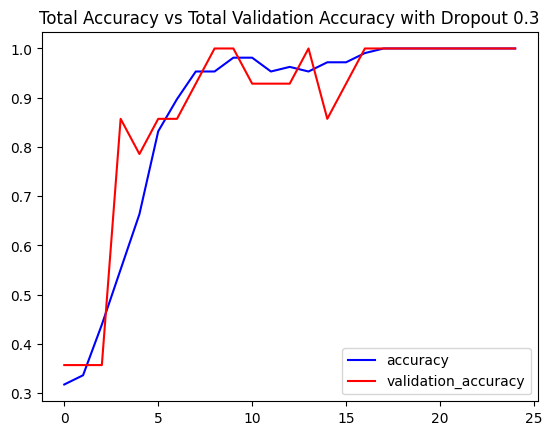

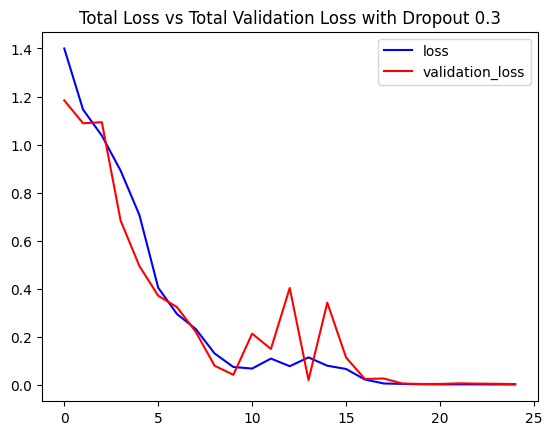

In [ ]:
plt.plot(plot.history['accuracy'], 'blue', label='accuracy')
plt.plot(plot.history['val_accuracy'], 'red', label='validation_accuracy')
plt.title(f"Total Accuracy vs Total Validation Accuracy with Dropout {dropout_rate}")
plt.legend()
plt.show()

plt.plot(plot.history['loss'], 'blue', label='loss')
plt.plot(plot.history['val_loss'], 'red', label='validation_loss')
plt.title(f"Total Loss vs Total Validation Loss with Dropout {dropout_rate}")
plt.legend()
plt.show()
